# Project 2
## Members
* Ethan Kamus
* Nathaniel Marquez
* Rebecca Lee

# Experiment 1

In [532]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('dataset.csv',delimiter=',',skiprows=1)

# Experiment 2

In [533]:
training_set = data[0:900]
test_set = data[900:1000]

len(training_set), len(test_set)

(900, 100)

# Experiment 3

In [534]:
# convert training set to 2D array and 
training_set = np.array(training_set)
# create x1 and x2 vectors
x1 = training_set[0:900,[0]]
x2 = training_set[0:900,[1]]
# create feature vector with ones column and x1, x2 attributes
X = np.hstack((np.ones_like(x1),x1,x2))
# target column vector
t = training_set[0:900,[2]] # matrix of output?
t = t.reshape(900,)

# differentiate with respect to w to get following optimal weight values
XX = np.dot(X.T,X)
inverse_XX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(inverse_XX,Xt)

w

array([0.69333661, 0.03664626, 0.02839225])

$$ y = 0.65683428 - 0.00632862x_1 - 0.00483534x_2$$

# Experiment 4

In [535]:
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]
# X = arr[0:900,[1,2]]
predictions = []
for i in X:
    predictions = np.append(predictions, [[w_0 + (i[0]*w_1) + (i[1]*w_2)]])
#     predictions.append(np.array([w_0 + (i[0]*w_1) + (i[1]*w_2)]))
loss = t - predictions
loss = np.square(loss)
avg_sq_loss = np.sum(loss)/len(loss)
avg_sq_loss

8.599408015247962

MSE: 0.1903883621895976

# Experiment 5

In [536]:
# X = np.hstack((np.ones_like(x1),x1,x2))
X = np.hstack((np.ones_like(x1),x1,x2, np.square(x1), np.square(x2)))
XX = np.dot(X.T,X)
inverse_XX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
wq = np.dot(inverse_XX,Xt)

wq_0 = wq[0]
wq_1 = wq[1]
wq_2 = wq[2]
wq_12 = wq[3]
wq_22 = wq[4]

predictions = []
for i in X:
    predictions = np.append(predictions, [[wq_0 + (i[1]*wq_1) 
                                     + (i[2]*wq_2) 
                                     + ((i[3])*wq_12) 
                                     + ((i[4])*wq_22)]])
loss = t - predictions
loss = np.square(loss)
avg_sq_loss = np.sum(loss)/len(loss)
avg_sq_loss

8.587120688069552

$$ y = 0.31183988 - 0.00377483x_1 + 0.00781421x_2 + 0.17753899x_1^2 + 0.08813606x_2^2 $$

MSE: 0.1544028141884278

# Experiment 6

In [537]:
test_set = np.array(test_set)
x1 = test_set[0:,[0]] # matrix of features?
x2 = test_set[0:,[1]]
t = test_set[0:,[2]]
t = t.reshape(100,)

X = np.hstack((np.ones_like(x1),x1,x2))

# linear
lin_predictions = []
for i in X:
    lin_predictions = np.append(lin_predictions, [[w_0 + (i[0]*w_1) + (i[1]*w_2)]])
loss = t - lin_predictions
loss = np.square(loss)
test_mse = np.sum(loss)/len(loss)

# quadratic
X = np.hstack((X, np.square(x1), np.square(x2)))
quad_predictions = []
for i in X:
    quad_predictions = np.append(quad_predictions, [[wq_0 + (i[1]*wq_1) 
                                     + (i[2]*wq_2) 
                                     + ((i[3])*wq_12) 
                                     + ((i[4])*wq_22)]])
loss = t - quad_predictions
loss = np.square(loss)
test_mse_q = np.sum(loss)/len(loss)
test_mse, test_mse_q

(7.8849120722674755, 7.882170673013778)

# Experiment 7

In [538]:
def calculate_loss(weights, X_vector, t_vector):
    predictions = []
    for i in X_vector:
        temp = 0
        for j in range(int(len(weights))):
            temp = temp + (i[j] * weights[j])
#             print(f'ij ----- {i[j]} * wj ----- {weights[j]} ---- temp {temp}\n\n')
        predictions = np.append(predictions, temp)
    loss = t_vector - predictions
    loss = np.square(loss)
    mse = np.sum(loss)/len(loss)
    return mse

In [539]:
def calculate_weights(order, x1, x2, target_set, isValidation = False):
    X_order = np.ones_like(x1)
    for x in range(1, order+1):
        X_order = np.hstack((X_order, np.power(x1, x), np.power(x2,x)))
    
    if (isValidation):
        return X_order

    XX_order = np.dot(X_order.T,X_order)
    inverse_XX_order = np.linalg.inv(XX_order)
    Xt_order = np.dot(X_order.T,target_set)
    w_order = (np.dot(inverse_XX_order,Xt_order))
    
    
    return w_order, X_order # return as a tuple in python

In [540]:
training_loss = []
validation_loss = []
def cross_validation(order, training_data):
    k = 5
    fold = int(len(training_data) / k)
    
    for i in range(1, order+1):
        j = 0
        test_mse, cv_mse = 0, 0
        for f in range(1, k+1):
            validation = np.array(training_data[int(j*fold):int(f*fold)])
            training = np.delete(training_data, slice(int(j*fold),int(f*fold)), 0)
            valid_x1, valid_x2, valid_t = validation[0:,[0]], validation[0:,[1]], validation[0:,[2]]
            valid_t = valid_t.reshape(valid_t.size)
            
            training_x1, training_x2, training_t = training[0:,[0]], training[0:,[1]], training[0:,[2]]
            training_t = training_t.reshape(training_t.size)
            
            t_results = calculate_weights(i, training_x1, training_x2, training_t)
            weights = t_results[0]
            tX_order = t_results[1]
#             training_loss.append(calculate_loss(weights, tX_order, training_t))

            vX_order = calculate_weights(i, valid_x1, valid_x2, valid_t, isValidation = True)
#             validation_loss.append(calculate_loss(weights, vX_order, valid_t))
            
            test_mse += calculate_loss(weights, tX_order, training_t)
            cv_mse += calculate_loss(weights, vX_order, valid_t)
            j += 1
        training_loss.append(test_mse / k)
        validation_loss.append(cv_mse / k)

In [541]:
cross_validation(8, training_set)
'Training Loss Results: ', training_loss , 'Validation Loss Results: ', validation_loss

('Training Loss Results: ',
 [8.585424175136499,
  8.570015371698974,
  8.562578349639221,
  8.534275710525652,
  8.42451734640557,
  8.402263856675855,
  8.38645590352802,
  8.37100125996366],
 'Validation Loss Results: ',
 [8.664561780661654,
  8.744172714794733,
  8.810585695415508,
  8.939061380507972,
  9.177323874191242,
  8.833396216294389,
  8.888724100286215,
  9.654768907623456])

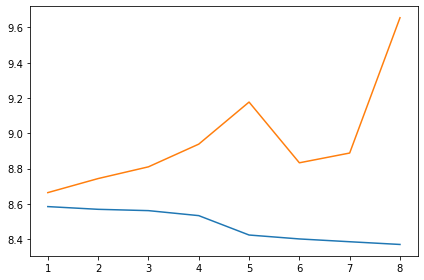

In [542]:
x = np.arange(1,9,1)
x
plt.plot(x, training_loss)
plt.plot(x, validation_loss)
